# Importing required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Loading Train data


In [2]:
import pandas as pd

df=pd.read_csv('bigdatamart_Train.csv')
df=pd.DataFrame(df)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# EDA Process-Train Data EDA

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


There is so much difference between 75% and max in Item_Visibility, Item_MRP, Item_Outlet_Sales. So Outliers might have present.

# Checking Null Values

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

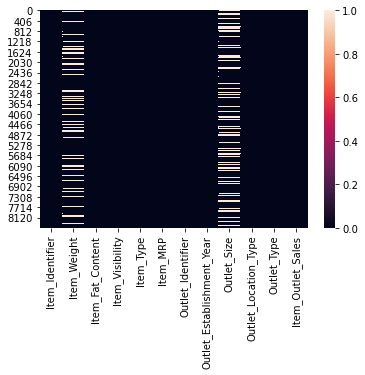

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Checking the mode of Outlet_Size by plot

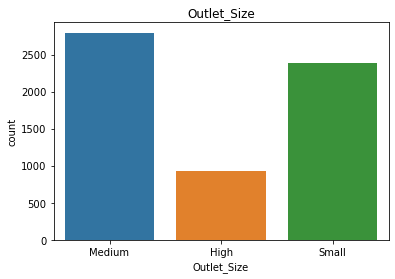

In [12]:
sns.countplot(x='Outlet_Size',data=df)
plt.title('Outlet_Size')
plt.show()


Observation: Mode of Outlet_Size is Medium

In [13]:
df['Outlet_Size'].replace(np.NaN,'Medium',inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Before filling null values of Item_Weight, let's check the relationship between Item_Type and Item_Weight



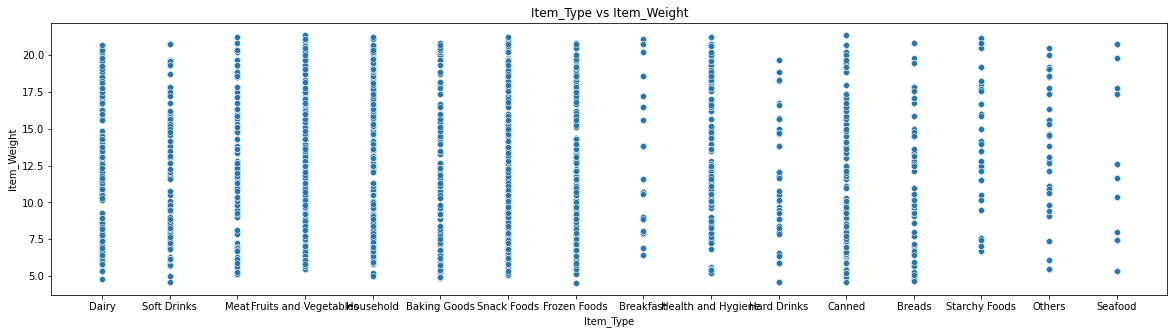

In [14]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=df['Item_Type'],y=df['Item_Weight'],data=df)
plt.title('Item_Type vs Item_Weight')
plt.show()

From this scatterplot it is concluded that there is no certain relationship between Item_Weight and Item_Type

So Let's fill the null values of Item_Weight using mean of Item_Weight column

In [16]:
df['Item_Weight'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64>

In [17]:
df['Item_Weight'].replace(np.NaN,9.3,inplace=True)
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [18]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Now df has no null values.

# Univariate Analysis

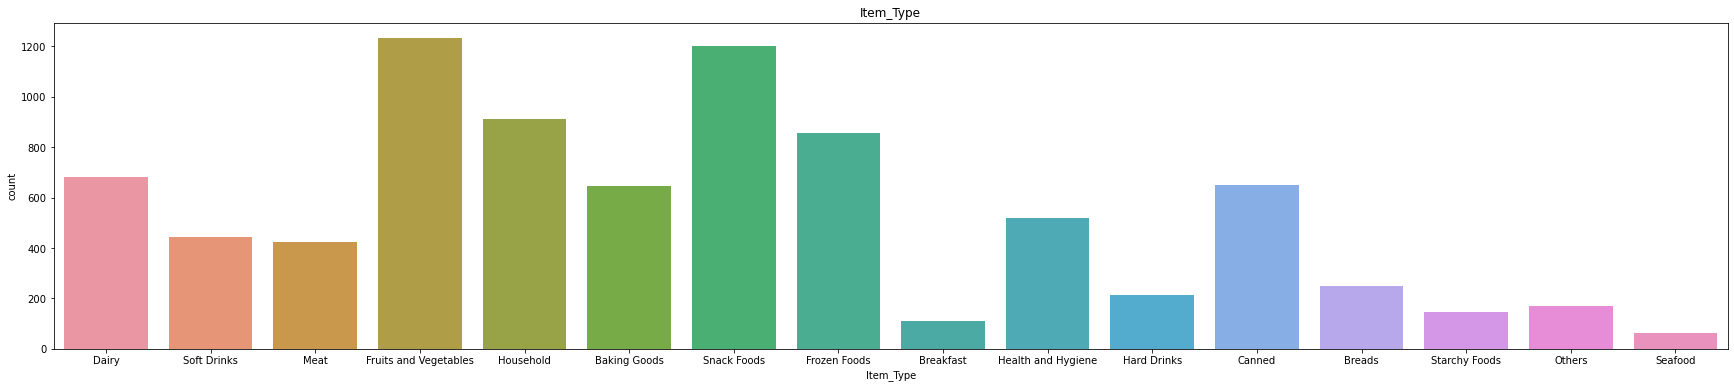

In [19]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=df)
plt.title('Item_Type')
plt.show()

Observation:

Fruits and Vegetables is the mode of Item_Type in this Dataset

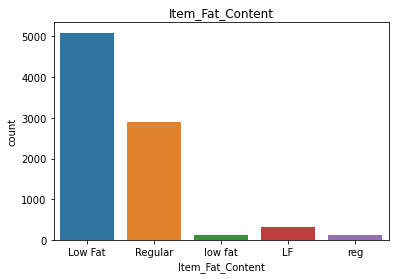

In [20]:
sns.countplot(x='Item_Fat_Content',data=df)
plt.title('Item_Fat_Content')
plt.show()

Observation:Most of the items almost 5000 have low fat content.

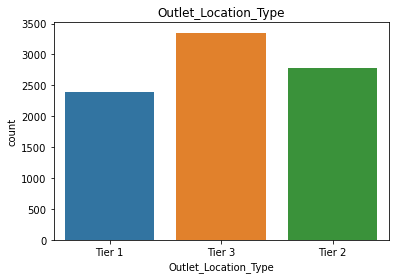

In [21]:
sns.countplot(x='Outlet_Location_Type',data=df)
plt.title('Outlet_Location_Type')
plt.show()

Observation: Tier 3 is the mode of Outlet_Location_Type

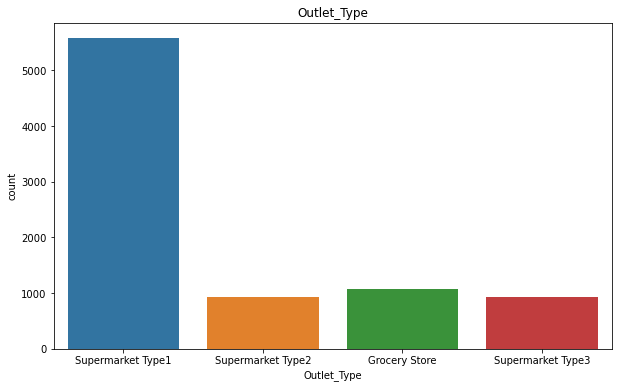

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Type',data=df)
plt.title('Outlet_Type')
plt.show()

Observation: Most outlets(more than 5000) are Supermarket Type1

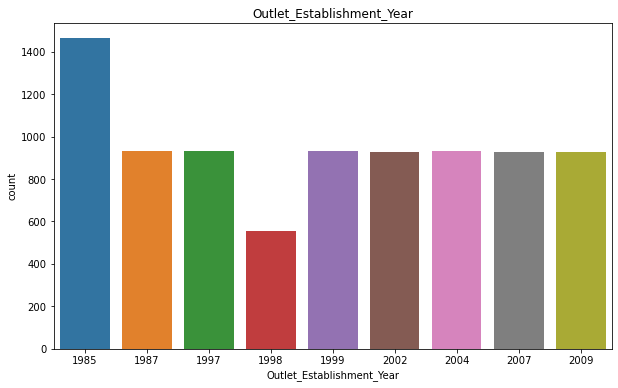

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Establishment_Year',data=df)
plt.title('Outlet_Establishment_Year')
plt.show()


Observation: In 1985 most of the Outlets are established.

# Dropping Columns

In [25]:
df=df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Bivariate Analysis

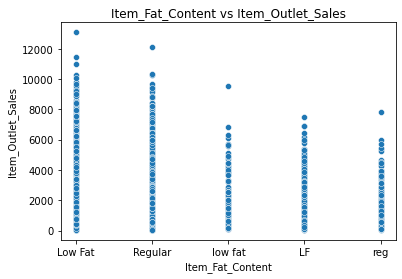

In [26]:
sns.scatterplot(x=df['Item_Fat_Content'],y=df['Item_Outlet_Sales'],data=df)
plt.title('Item_Fat_Content vs Item_Outlet_Sales')
plt.show()

Observation:Low Fat Items has highest Sales

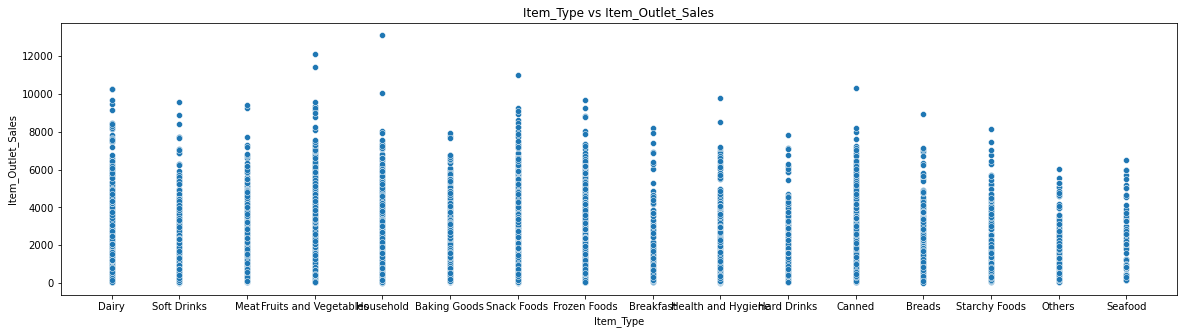

In [27]:
plt.figure(figsize=(20,5))
sns.scatterplot(x=df['Item_Type'],y=df['Item_Outlet_Sales'],data=df)
plt.title('Item_Type vs Item_Outlet_Sales')
plt.show()

Observation: Sales of Fruits and Vegetables touching high.

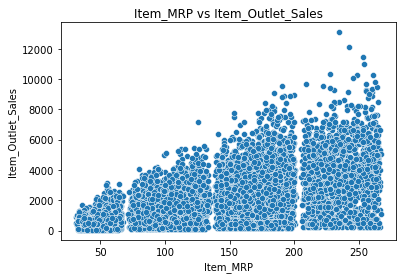

In [28]:
sns.scatterplot(x=df['Item_MRP'],y=df['Item_Outlet_Sales'],data=df)
plt.title('Item_MRP vs Item_Outlet_Sales')
plt.show()

Observation: Sales increased with MRP

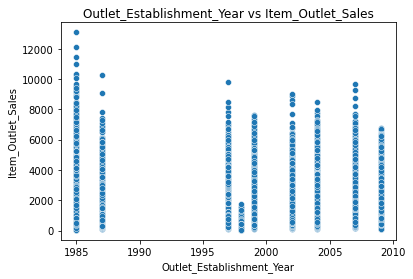

In [29]:
sns.scatterplot(x=df['Outlet_Establishment_Year'],y=df['Item_Outlet_Sales'],data=df)
plt.title('Outlet_Establishment_Year vs Item_Outlet_Sales')
plt.show()

Observation: Old outlets have higher sales than newer ones.

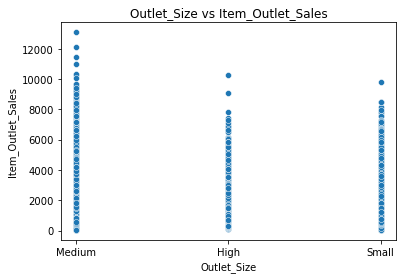

In [30]:
sns.scatterplot(x=df['Outlet_Size'],y=df['Item_Outlet_Sales'],data=df)
plt.title('Outlet_Size vs Item_Outlet_Sales')
plt.show()


Observation: Medium Outlets have highest sales.

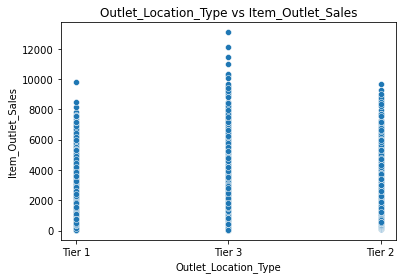

In [31]:
sns.scatterplot(x=df['Outlet_Location_Type'],y=df['Item_Outlet_Sales'],data=df)
plt.title('Outlet_Location_Type vs Item_Outlet_Sales')
plt.show()

Observation: Tier 3 location has highest sales.

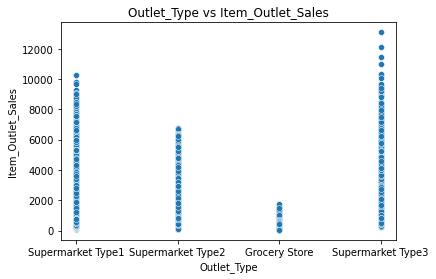

In [32]:
sns.scatterplot(x=df['Outlet_Type'],y=df['Item_Outlet_Sales'],data=df)
plt.title('Outlet_Type vs Item_Outlet_Sales')
plt.show()

Observation: Supermarket Type3 has highest sales.

# Label Encoding

In [34]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

list1=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    
df    

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [36]:
df['Outlet_Years']=2021-df['Outlet_Establishment_Year']
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380,22
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228,12
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700,22
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800,23
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834,34
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850,19
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136,17
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976,12


In [37]:
df=df.drop(['Outlet_Establishment_Year'],axis=1) 
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,9.300,1,0.016047,4,249.8092,1,0,1,3735.1380,22
1,5.920,2,0.019278,14,48.2692,1,2,2,443.4228,12
2,17.500,1,0.016760,10,141.6180,1,0,1,2097.2700,22
3,19.200,2,0.000000,6,182.0950,1,2,0,732.3800,23
4,8.930,1,0.000000,9,53.8614,0,2,1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,0,2,1,2778.3834,34
8519,8.380,2,0.046982,0,108.1570,1,1,1,549.2850,19
8520,10.600,1,0.035186,8,85.1224,2,1,1,1193.1136,17
8521,7.210,2,0.145221,13,103.1332,1,2,2,1845.5976,12


# Multivariate Analysis

# Correlation

In [38]:
dfcorr=df.corr()
dfcorr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.015589,-0.039422,0.027096,0.026242,-0.050498,-0.024123,-0.124381,-0.013399,-0.203217
Item_Fat_Content,-0.015589,1.000000,0.034042,-0.115958,-0.000876,-0.012058,-0.004102,-0.004214,0.009800,0.000189
Item_Visibility,-0.039422,0.034042,1.000000,-0.035249,-0.001315,0.069309,-0.028099,-0.173468,-0.128625,0.074834
Item_Type,0.027096,-0.115958,-0.035249,1.000000,0.032651,-0.001859,0.003084,0.003053,0.017048,-0.004970
Item_MRP,0.026242,-0.000876,-0.001315,0.032651,1.000000,0.006059,0.000232,-0.001975,0.567574,-0.005020
Outlet_Size,-0.050498,-0.012058,0.069309,-0.001859,0.006059,1.000000,-0.614311,-0.201483,-0.086182,-0.193389
Outlet_Location_Type,-0.024123,-0.004102,-0.028099,0.003084,0.000232,-0.614311,1.000000,0.467219,0.089367,0.089216
Outlet_Type,-0.124381,-0.004214,-0.173468,0.003053,-0.001975,-0.201483,0.467219,1.000000,0.401522,0.122304
Item_Outlet_Sales,-0.013399,0.009800,-0.128625,0.017048,0.567574,-0.086182,0.089367,0.401522,1.000000,0.049135
Outlet_Years,-0.203217,0.000189,0.074834,-0.004970,-0.005020,-0.193389,0.089216,0.122304,0.049135,1.000000


<AxesSubplot:>

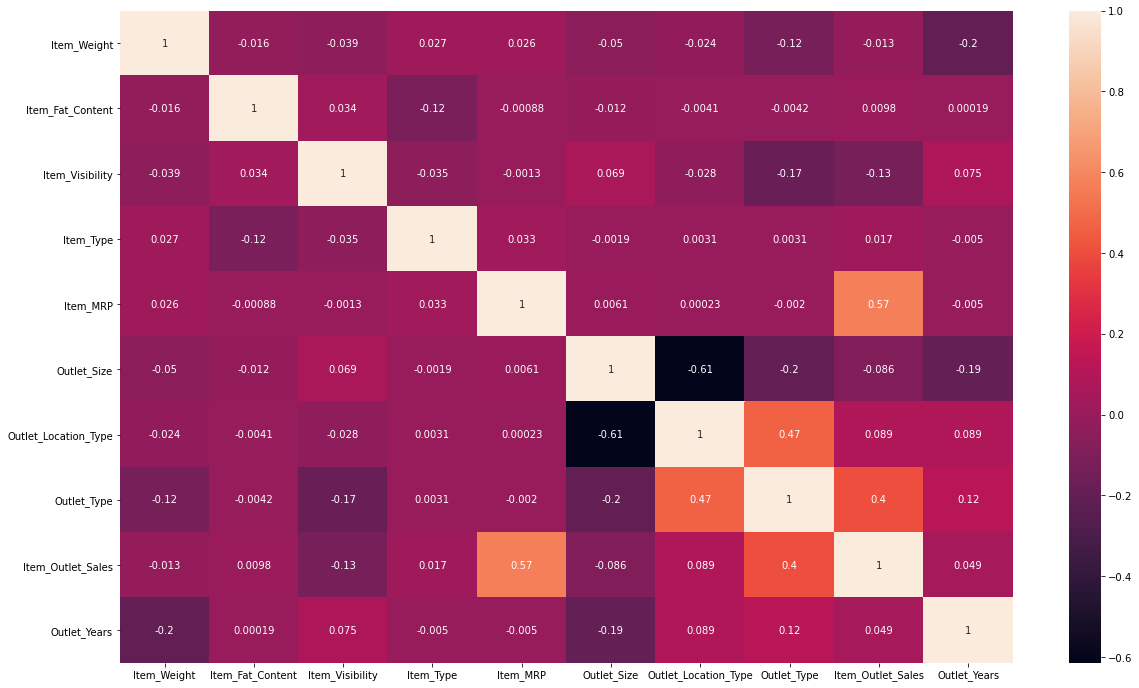

In [39]:
plt.figure(figsize=(20,12))
sns.heatmap(dfcorr,annot=True)

MRP and Outlet_Type is strongly correlated with Sales.

# Checking Outliers

In [40]:
df.shape

(8523, 10)

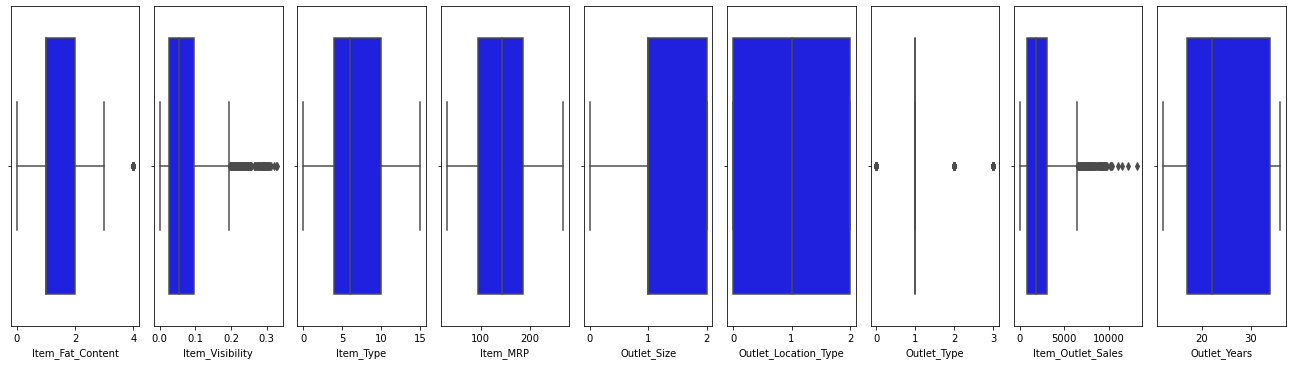

In [41]:
collist=df.columns.values
ncol=10
nrows=10

plt.figure(figsize=(2*ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='h')
    plt.tight_layout()

There is so many outliers in Item_Visibility and Item_Outlet_Sales

# Removal of Outliers

In [42]:
import scipy
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]

new_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,9.300,1,0.016047,4,249.8092,1,0,1,3735.1380,22
1,5.920,2,0.019278,14,48.2692,1,2,2,443.4228,12
2,17.500,1,0.016760,10,141.6180,1,0,1,2097.2700,22
3,19.200,2,0.000000,6,182.0950,1,2,0,732.3800,23
4,8.930,1,0.000000,9,53.8614,0,2,1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,0,2,1,2778.3834,34
8519,8.380,2,0.046982,0,108.1570,1,1,1,549.2850,19
8520,10.600,1,0.035186,8,85.1224,2,1,1,1193.1136,17
8521,7.210,2,0.145221,13,103.1332,1,2,2,1845.5976,12


In [43]:
df.shape

(8523, 10)

In [44]:
new_df.shape

(8222, 10)

In [45]:
#Percentage loss in data while removing outliers
Per=(8523-8222)*100/8523
Per

3.5316203214830457

3.53% is ok for removing outliers from dataset

# Checking Skewness

In [46]:
new_df.skew()

Item_Weight             0.385956
Item_Fat_Content        0.291106
Item_Visibility         0.794506
Item_Type               0.094578
Item_MRP                0.139153
Outlet_Size            -0.089519
Outlet_Location_Type   -0.202794
Outlet_Type             0.957163
Item_Outlet_Sales       0.877476
Outlet_Years            0.420927
dtype: float64

As Item_Outlet_Sales skewness is 0.88. Let's set the range of normal distribution is +-0.88.

Because we cant modify output variables.

Outlet_Type is encoded so it cant be changed. so let it remain on 0.96.

In [47]:
new_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,9.300,1,0.016047,4,249.8092,1,0,1,3735.1380,22
1,5.920,2,0.019278,14,48.2692,1,2,2,443.4228,12
2,17.500,1,0.016760,10,141.6180,1,0,1,2097.2700,22
3,19.200,2,0.000000,6,182.0950,1,2,0,732.3800,23
4,8.930,1,0.000000,9,53.8614,0,2,1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,0,2,1,2778.3834,34
8519,8.380,2,0.046982,0,108.1570,1,1,1,549.2850,19
8520,10.600,1,0.035186,8,85.1224,2,1,1,1193.1136,17
8521,7.210,2,0.145221,13,103.1332,1,2,2,1845.5976,12


In [48]:
#Moving the Target variable Item_Outlet_Sales column to last
columns=list(new_df.columns)
columns

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales',
 'Outlet_Years']

In [49]:
columns[-2],columns[-1]=columns[-1],columns[-2]

In [50]:
new_df=new_df[columns]
new_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1,0,1,22,3735.1380
1,5.920,2,0.019278,14,48.2692,1,2,2,12,443.4228
2,17.500,1,0.016760,10,141.6180,1,0,1,22,2097.2700
3,19.200,2,0.000000,6,182.0950,1,2,0,23,732.3800
4,8.930,1,0.000000,9,53.8614,0,2,1,34,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,0,2,1,34,2778.3834
8519,8.380,2,0.046982,0,108.1570,1,1,1,19,549.2850
8520,10.600,1,0.035186,8,85.1224,2,1,1,17,1193.1136
8521,7.210,2,0.145221,13,103.1332,1,2,2,12,1845.5976


# Preparing Input and Output Variables

In [52]:
x=new_df.iloc[:,:-1]
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,9.300,1,0.016047,4,249.8092,1,0,1,22
1,5.920,2,0.019278,14,48.2692,1,2,2,12
2,17.500,1,0.016760,10,141.6180,1,0,1,22
3,19.200,2,0.000000,6,182.0950,1,2,0,23
4,8.930,1,0.000000,9,53.8614,0,2,1,34
...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,0,2,1,34
8519,8.380,2,0.046982,0,108.1570,1,1,1,19
8520,10.600,1,0.035186,8,85.1224,2,1,1,17
8521,7.210,2,0.145221,13,103.1332,1,2,2,12


In [53]:
y=pd.DataFrame(new_df.iloc[:,-1])
y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


# Scaling the Input Data

In [54]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)
scaled_x

array([[-0.6699906 , -0.58389405, -1.0101939 , ..., -1.37079631,
        -0.26058572, -0.12279569],
       [-1.4294691 ,  1.17592152, -0.94204081, ...,  1.09922062,
         1.01930425, -1.32430249],
       [ 1.1725312 , -0.58389405, -0.99515861, ..., -1.37079631,
        -0.26058572, -0.12279569],
       ...,
       [-0.37788348, -0.58389405, -0.60647545, ..., -0.13578784,
        -0.26058572, -0.72354909],
       [-1.13960896,  1.17592152,  1.71459549, ...,  1.09922062,
         1.01930425, -1.32430249],
       [ 0.56584719, -0.58389405, -0.4020317 , ..., -1.37079631,
        -0.26058572,  0.11750567]])

# Finding Best Random State

In [55]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
best_r_state=0
accu=0

for i in range(30,200):
    train_x,test_x,train_y,test_y=train_test_split(scaled_x,y,test_size=0.30,random_state=i)
    mod=LinearRegression()
    mod.fit(train_x,train_y)
    pred_y=mod.predict(test_x)
    tempaccu=r2_score(test_y,pred_y)
    if tempaccu>accu:
        accu=tempaccu
        best_r_state=i

print(f"Best random_state {best_r_state}")

Best random_state 151


# Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(scaled_x,y,test_size=0.30,random_state=151)
lm=LinearRegression()
lm.fit(train_x,train_y)
pred_y=lm.predict(test_x)

print("Accuracy Score",r2_score(test_y,pred_y))
print("Mean Absolute Error", mean_absolute_error(test_y,pred_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,pred_y))**0.5 )

Accuracy Score 0.5227289527345858
Mean Absolute Error 840.5939171563255
Root Mean Squared Error 1094.6724708225054


# KNeighborsRegressor

In [57]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()
knn.fit(train_x,train_y)
knn_y=knn.predict(test_x)

print("Accuracy Score",r2_score(test_y,knn_y))
print("Mean Absolute Error", mean_absolute_error(test_y,knn_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,knn_y))**0.5 )

Accuracy Score 0.5244482396441841
Mean Absolute Error 789.8131440616133
Root Mean Squared Error 1092.6990072468338


# Ensemble Techniques

In [58]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

rfr=RandomForestRegressor(n_estimators=100,random_state=151)
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()

for val in [rfr,abr,gbr]:
    val.fit(train_x,train_y)
    print(val,"Accuracy Score","\t", r2_score(test_y,val.predict(test_x)))

RandomForestRegressor(random_state=151) Accuracy Score 	 0.5682645155771342
AdaBoostRegressor() Accuracy Score 	 0.5764025357446775
GradientBoostingRegressor() Accuracy Score 	 0.6122378509457873


# GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr=SVR()
parameters={'kernel':['linear','rbf','poly'],'C':[1,10]}
clf=GridSearchCV(svr,parameters)
clf.fit(scaled_x,y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf', 'poly']})

In [60]:
print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


These are the parameters that will be fed to SVR to create a best model.

# Support Vector Machine

In [61]:
svr=SVR(kernel='linear',C=10) #parameters given from GridSearchCV method.
svr.fit(train_x,train_y)
svr.score(train_x,train_y)
svr_yy=svr.predict(test_x)
print("Accuracy Score",r2_score(test_y,svr_yy))
print("Mean Absolute Error", mean_absolute_error(test_y,svr_yy))
print("Root Mean Squared Error", (mean_squared_error(test_y,svr_yy))**0.5 )

Accuracy Score 0.5126990931135925
Mean Absolute Error 837.7913786740587
Root Mean Squared Error 1106.114948221319


# CROSS VALIDATION

In [62]:
knn=KNeighborsRegressor(n_neighbors=9)
knnscores=cross_val_score(knn,scaled_x,y,cv=5)
print(knnscores)
print(knnscores.mean(), knnscores.std())
print("Accuracy Score", knnscores.mean())

[0.52482175 0.52579882 0.5231077  0.53457164 0.55121553]
0.5319030890725814 0.010438944276736185
Accuracy Score 0.5319030890725814


# L1 and L2 Regularization
To avoid overfitting and underfitting we can use Lasso, Ridge and ElasticNet

Searching alpha value for best model using GridSearchCV
Lasso Regression

In [63]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
ls=Lasso()

parameters={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10]}
clfl=GridSearchCV(ls,parameters)
clfl.fit(scaled_x,y)
clfl.score(scaled_x,y)

0.4964493982497983

In [64]:
print(clfl.best_params_)

{'alpha': 1}


In [65]:
lss=Lasso(alpha=1)
lss.fit(scaled_x,y)
lss_y=lss.predict(test_x)
print("Accuracy Score",r2_score(test_y,lss_y))
print("Mean Absolute Error", mean_absolute_error(test_y,lss_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,lss_y))**0.5 )

Accuracy Score 0.5241884448290983
Mean Absolute Error 839.8761063110128
Root Mean Squared Error 1092.9974382485393


In [66]:
#Ridge Regression
rd=Ridge()
parameters={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10]}
clff=GridSearchCV(rd,parameters)
clff.fit(scaled_x,y)
clff.score(scaled_x,y)

0.49645399486156916

In [67]:
print(clff.best_params_)

{'alpha': 10}


In [68]:
rdd=Ridge(alpha=10)
rdd.fit(scaled_x,y)
rdd_y=rdd.predict(test_x)
print("Accuracy Score",r2_score(test_y,rdd_y))
print("Mean Absolute Error", mean_absolute_error(test_y,rdd_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,rdd_y))**0.5 )

Accuracy Score 0.5242261777069399
Mean Absolute Error 839.8994232725665
Root Mean Squared Error 1092.954098867595


In [69]:
#ElasticNet Regression
el=ElasticNet()
parameters={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10]}
clfff=GridSearchCV(el,parameters)
clfff.fit(scaled_x,y)
clfff.score(scaled_x,y)

0.49643059983175397

In [70]:
print(clfff.best_params_)

{'alpha': 0.01}


In [71]:
eln=ElasticNet(alpha=0.01)
eln.fit(scaled_x,y)
eln_y=eln.predict(test_x)
print("Accuracy Score",r2_score(test_y,eln_y))
print("Mean Absolute Error", mean_absolute_error(test_y,eln_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,eln_y))**0.5 )

Accuracy Score 0.5240667204228198
Mean Absolute Error 839.8714269742323
Root Mean Squared Error 1093.1372372454932


In [72]:
print("Linear Regression",r2_score(test_y,pred_y))
print("KNeighborsRegressor",r2_score(test_y,knn_y))
print("RandomForestRegressor",r2_score(test_y,rfr.predict(test_x)))
print("AdaBoostRegressor",r2_score(test_y,abr.predict(test_x)))
print("GradientBoostingRegressor",r2_score(test_y,gbr.predict(test_x)))
print("SVR",r2_score(test_y,svr_yy))
print("Cross Validation using KNeighborsRegressor",knnscores.mean())
print("Lasso Regression",r2_score(test_y,lss_y))
print("Ridge Regression",r2_score(test_y,rdd_y))
print("ElasticNet Regression",r2_score(test_y,eln_y))

Linear Regression 0.5227289527345858
KNeighborsRegressor 0.5244482396441841
RandomForestRegressor 0.5682645155771342
AdaBoostRegressor 0.5764025357446775
GradientBoostingRegressor 0.6122378509457873
SVR 0.5126990931135925
Cross Validation using KNeighborsRegressor 0.5319030890725814
Lasso Regression 0.5241884448290983
Ridge Regression 0.5242261777069399
ElasticNet Regression 0.5240667204228198


Conclusion
The best Accuracy is at GradientBoostingRegressor() having 61.22%

In all algorithms:

The Mean Absolute Error is ranging between 800-900.

The Root Mean Square Error is ranging between 1000-1100.

# Loading the Test Dataset for EDA

In [73]:
dff=pd.read_csv('bigdatamart_Test.csv')
dff=pd.DataFrame(dff)
dff.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [74]:
dff.shape

(5681, 11)

In [75]:
dff.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [76]:
df.dtypes

Item_Weight             float64
Item_Fat_Content          int32
Item_Visibility         float64
Item_Type                 int32
Item_MRP                float64
Outlet_Size               int32
Outlet_Location_Type      int32
Outlet_Type               int32
Item_Outlet_Sales       float64
Outlet_Years              int64
dtype: object

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   int32  
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   int32  
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   int32  
 6   Outlet_Location_Type  8523 non-null   int32  
 7   Outlet_Type           8523 non-null   int32  
 8   Item_Outlet_Sales     8523 non-null   float64
 9   Outlet_Years          8523 non-null   int64  
dtypes: float64(4), int32(5), int64(1)
memory usage: 499.5 KB


In [78]:
dff.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [79]:
#Checking Null Values
dff.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

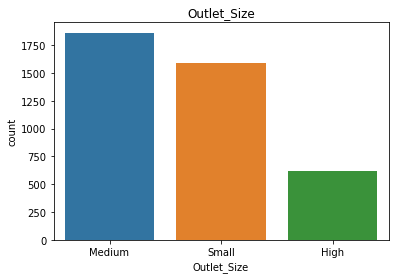

In [80]:
sns.countplot(x='Outlet_Size',data=dff)
plt.title('Outlet_Size')
plt.show()


Observation: Mode of Outlet_Size is Medium

Filling null values of Outlet_Size

In [81]:
dff['Outlet_Size'].replace(np.NaN,'Medium',inplace=True)
dff

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [82]:
dff['Item_Weight'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       20.750
1        8.300
2       14.600
3        7.315
4          NaN
         ...  
5676    10.500
5677     7.600
5678    10.000
5679    15.300
5680     9.500
Name: Item_Weight, Length: 5681, dtype: float64>

In [83]:
dff['Item_Weight'].replace(np.NaN,20.75,inplace=True)
dff


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,20.750,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [84]:
dff.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Preparing testing data to fetch to the best model for getting accurate results

In [85]:
dff=dff.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
dff

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,20.750,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500,Regular,0.013496,Snack Foods,141.3154,1997,Small,Tier 1,Supermarket Type1
5677,7.600,Regular,0.142991,Starchy Foods,169.1448,2009,Medium,Tier 3,Supermarket Type2
5678,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,2002,Medium,Tier 2,Supermarket Type1
5679,15.300,Regular,0.000000,Canned,214.6218,2007,Medium,Tier 2,Supermarket Type1


Label Encoding as done in train data

In [86]:
import sklearn
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

list1=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in list1:
    dff[val]=le.fit_transform(dff[val].astype(str))

In [87]:
dff

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,1,0.007565,13,107.8622,1999,1,0,1
1,8.300,4,0.038428,4,87.3198,2007,1,1,1
2,14.600,1,0.099575,11,241.7538,1998,1,2,0
3,7.315,1,0.015388,13,155.0340,2007,1,1,1
4,20.750,2,0.118599,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500,2,0.013496,13,141.3154,1997,2,0,1
5677,7.600,2,0.142991,15,169.1448,2009,1,2,2
5678,10.000,1,0.073529,8,118.7440,2002,1,1,1
5679,15.300,2,0.000000,3,214.6218,2007,1,1,1


In [88]:
dff['Outlet_Years']=2021-dff['Outlet_Establishment_Year']
dff

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,20.750,1,0.007565,13,107.8622,1999,1,0,1,22
1,8.300,4,0.038428,4,87.3198,2007,1,1,1,14
2,14.600,1,0.099575,11,241.7538,1998,1,2,0,23
3,7.315,1,0.015388,13,155.0340,2007,1,1,1,14
4,20.750,2,0.118599,4,234.2300,1985,1,2,3,36
...,...,...,...,...,...,...,...,...,...,...
5676,10.500,2,0.013496,13,141.3154,1997,2,0,1,24
5677,7.600,2,0.142991,15,169.1448,2009,1,2,2,12
5678,10.000,1,0.073529,8,118.7440,2002,1,1,1,19
5679,15.300,2,0.000000,3,214.6218,2007,1,1,1,14


In [89]:
dff=dff.drop(['Outlet_Establishment_Year'],axis=1)
dff

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,20.750,1,0.007565,13,107.8622,1,0,1,22
1,8.300,4,0.038428,4,87.3198,1,1,1,14
2,14.600,1,0.099575,11,241.7538,1,2,0,23
3,7.315,1,0.015388,13,155.0340,1,1,1,14
4,20.750,2,0.118599,4,234.2300,1,2,3,36
...,...,...,...,...,...,...,...,...,...
5676,10.500,2,0.013496,13,141.3154,2,0,1,24
5677,7.600,2,0.142991,15,169.1448,1,2,2,12
5678,10.000,1,0.073529,8,118.7440,1,1,1,19
5679,15.300,2,0.000000,3,214.6218,1,1,1,14


In [90]:
#Scaling the test data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_test_x=scaler.fit_transform(dff)
scaled_test_x

array([[ 1.27788484, -0.57528374, -1.13407715, ..., -1.369215  ,
        -0.25276858, -0.13989058],
       [-1.10715059,  4.10469757, -0.53185019, ..., -0.1388274 ,
        -0.25276858, -1.09551169],
       [ 0.0997348 , -0.57528374,  0.6613164 , ...,  1.0915602 ,
        -1.50799439, -0.02043794],
       ...,
       [-0.78148311, -0.57528374,  0.15307374, ..., -0.1388274 ,
        -0.25276858, -0.4982485 ],
       [ 0.23383318,  0.98471003, -1.28168987, ..., -0.1388274 ,
        -0.25276858, -1.09551169],
       [-0.87726766,  0.98471003,  0.76171558, ..., -0.1388274 ,
        -0.25276858, -0.4982485 ]])

In [91]:
#Applying the best model, GradientBoostingRegressor to obtain output.
gbr_new_y=gbr.predict(scaled_test_x)                   
print(gbr_new_y)

[1666.86217914 1449.92472771  635.70075228 ... 1816.8306783  3793.62021568
 1292.16288457]


In [92]:
type(gbr_new_y)

numpy.ndarray

In [93]:
y1=pd.DataFrame(gbr_new_y)
y1

,0
0,1666.862179
1,1449.924728
2,635.700752
3,2519.285425
4,5058.936812
...,...
5676,2144.556338
5677,2689.938607
5678,1816.830678
5679,3793.620216


# Saving the Model

In [94]:
import pickle

filename='Big_Data_Mart_Prob_file.pkl'
pickle.dump(gbr,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(scaled_test_x)

array([1666.86217914, 1449.92472771,  635.70075228, ..., 1816.8306783 ,
       3793.62021568, 1292.16288457])